# 1. Import Library and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("shopping_behavior_updated.csv")

# 2. Data Overview

In [4]:
#Display first 5 rows of the dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
#Dataset Info
print("Information about dataset:")
print("-" * 60)
df.info()

Information about dataset:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Disco

In [6]:
# summary of descriptive statistics
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# check for missing values
print("Missing Values Analysis:")
total_missing = df.isnull().sum().sum()
if (total_missing > 0):
    print(f"Total missing values: {total_missing}")
else:
    print("There is no missing values")

Missing Values Analysis:
There is no missing values


In [8]:
# check for duplicates
print("Duplicats Analysis:")
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")


Duplicats Analysis:
Total duplicate rows: 0


In [9]:
# check for outliers
num_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
table = []
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lowerBound = q1 - 1.5*IQR
    upperBound = q3 + 1.5*IQR
    outliers = ((df[col] < lowerBound) | (df[col] > upperBound)).sum()
    table.append([col, outliers])

outliers_df = pd.DataFrame(table, columns=["columns", "n_outliers"])
outliers_df

,columns,n_outliers
0,Age,0
1,Purchase Amount (USD),0
2,Review Rating,0
3,Previous Purchases,0


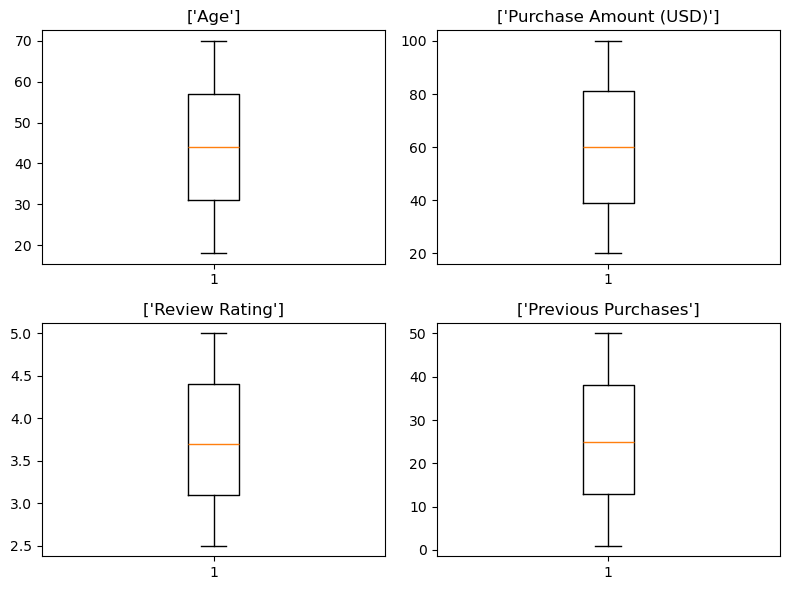

In [10]:
# using visualization for make sure there are no outliers
num_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
positions = [(0, 0), (0,1), (1, 0), (1,1)]
fig, ax = plt.subplots(2,2, figsize=(8, 6))
for i in range(4):
    r, c = positions[i]
    ax[r,c].boxplot(df[num_cols[i]])
    ax[r,c].set_title([num_cols[i]])
    
plt.tight_layout()
plt.show()

## Conclusion:
After performing a data overview that included checks for outliers, duplicates, and missing values using the steps described above, the observations indicate that there are no outliers, duplicates, or missing values. Therefore, the dataset is clean and ready to be used for following step.

# 3. Exploratory Data Analysis (EDA)

## 3.1 Numerical Features Analysis

### - Univariate Analysis - Purchase Amount

In [11]:
print(df["Purchase Amount (USD)"].describe())
print(f"Total Revenue: $ {df["Purchase Amount (USD)"].sum()}")
print(f"Average Revenue per Customer: $ {df["Purchase Amount (USD)"].mean()}")

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64
Total Revenue: $ 233081
Average Revenue per Customer: $ 59.76435897435898


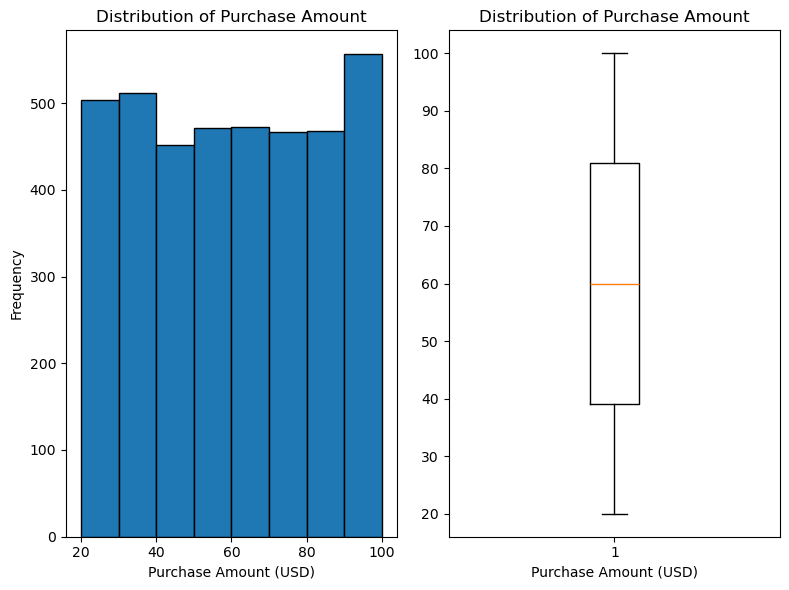

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8, 6))

bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

ax[0].hist(df["Purchase Amount (USD)"], bins=bins, edgecolor="black")
ax[0].set_title("Distribution of Purchase Amount")
ax[0].set_xlabel("Purchase Amount (USD)")
ax[0].set_ylabel("Frequency")

ax[1].boxplot(df["Purchase Amount (USD)"])
ax[1].set_title("Distribution of Purchase Amount")
ax[1].set_xlabel("Purchase Amount (USD)")

plt.tight_layout()
plt.show()

### - Univariate Analysis - Previous Purchase


In [13]:
df["Previous Purchases"].describe()

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

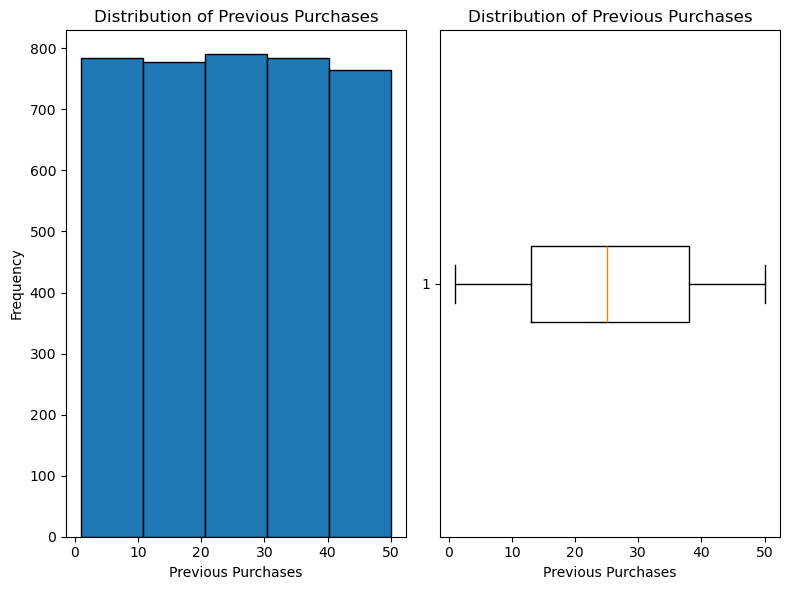

In [14]:
fig, ax = plt.subplots(1,2, figsize=(8,6))

ax[0].hist(df["Previous Purchases"], bins = 5, edgecolor="black")
ax[0].set_title("Distribution of Previous Purchases")
ax[0].set_xlabel("Previous Purchases")
ax[0].set_ylabel("Frequency")

ax[1].boxplot(df["Previous Purchases"], vert=False)
ax[1].set_title("Distribution of Previous Purchases")
ax[1].set_xlabel("Previous Purchases")

plt.tight_layout()
plt.show()

### - Univariate Analysis - Age


In [15]:
df["Age"].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

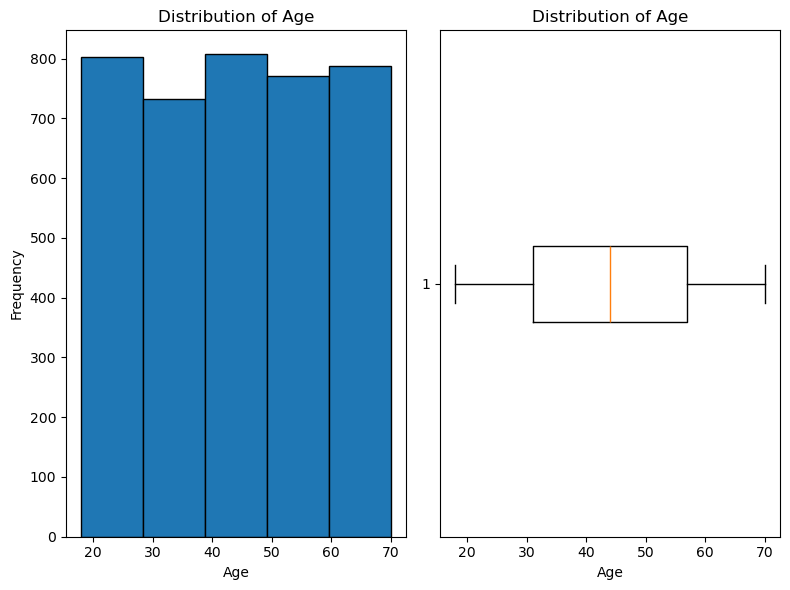

In [16]:
fig, ax = plt.subplots(1,2, figsize=(8,6))

ax[0].hist(df["Age"], bins = 5, edgecolor="black")
ax[0].set_title("Distribution of Age")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")

ax[1].boxplot(df["Age"], vert=False)
ax[1].set_title("Distribution of Age")
ax[1].set_xlabel("Age")

plt.tight_layout()
plt.show()

### - Univariate Analysis - Review Rating


In [17]:
df["Review Rating"].describe()

count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64

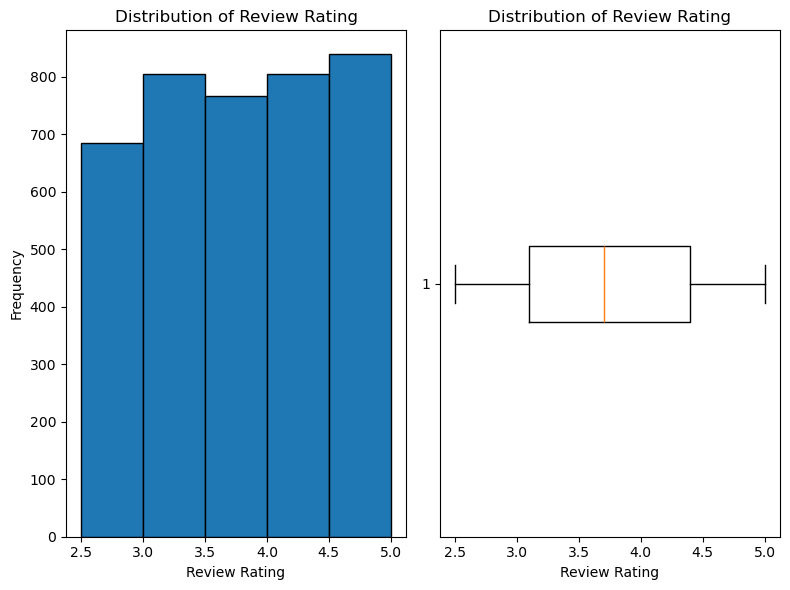

In [18]:
fig, ax = plt.subplots(1,2, figsize=(8,6))

ax[0].hist(df["Review Rating"], bins = 5, edgecolor="black")
ax[0].set_title("Distribution of Review Rating")
ax[0].set_xlabel("Review Rating")
ax[0].set_ylabel("Frequency")

ax[1].boxplot(df["Review Rating"], vert=False)
ax[1].set_title("Distribution of Review Rating")
ax[1].set_xlabel("Review Rating")

plt.tight_layout()
plt.show()

#### Results from Univariate Analysis (Numerical Features):
- Distribution of numeric columns is even
- Dataset has no outliers

## 3.2 Customer Demographics Analysis

### - Age

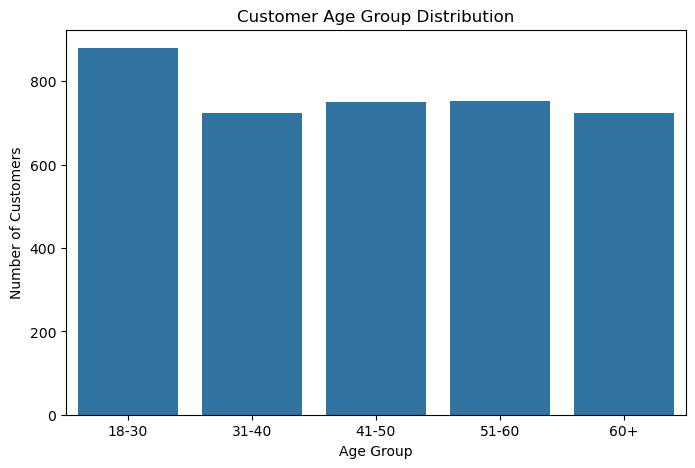

In [19]:
bins = [18, 30, 40, 50, 60, 100]
labels = ["18-30", "31-40", "41-50", "51-60", "60+"]

df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

plt.figure(figsize=(8,5))
sns.countplot(x="Age Group", data=df, order=labels)

plt.title("Customer Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")

plt.show()

C:\Users\T U F\AppData\Local\Temp\ipykernel_19616\3338380699.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age Group")["Purchase Amount (USD)"]


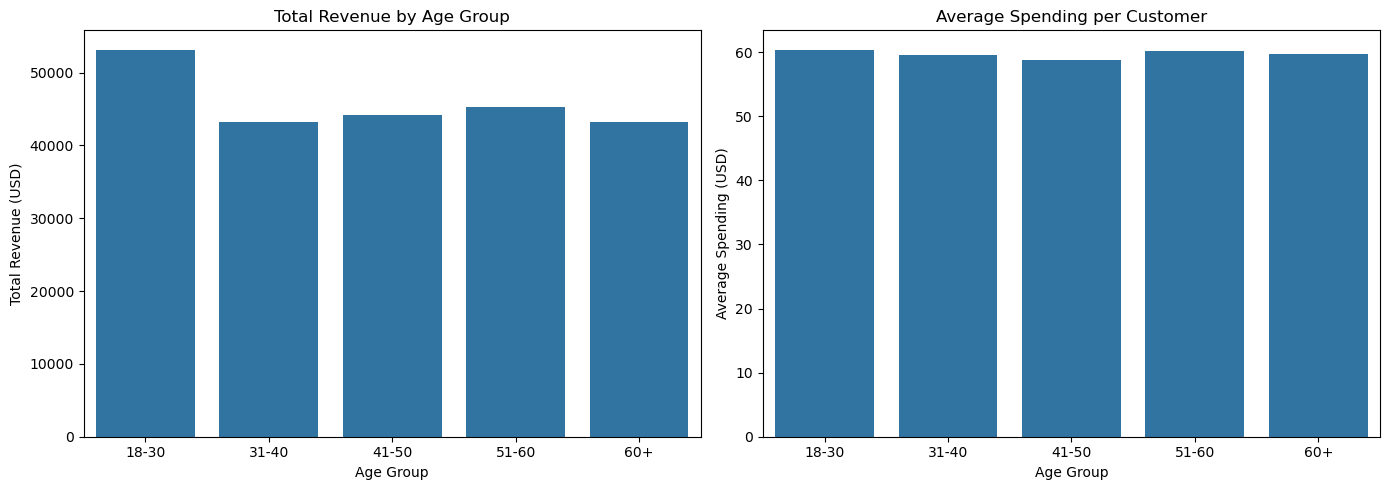

In [20]:
age_grouped = (
    df.groupby("Age Group")["Purchase Amount (USD)"]
      .agg(total_revenue="sum", avg_spending="mean")
      .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(
    ax=axes[0],
    x="Age Group",
    y="total_revenue",
    data=age_grouped,
    order=labels
)

axes[0].set_title("Total Revenue by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Total Revenue (USD)")


sns.barplot(
    ax=axes[1],
    x="Age Group",
    y="avg_spending",
    data=age_grouped,
    order=labels
)

axes[1].set_title("Average Spending per Customer")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Average Spending (USD)")


plt.tight_layout()
plt.show()

### Insight:
- The 18–30 age group has the highest number of customers.
- Total revenue from the 18–30 age group is also the highest.
- Average revenue per customer is relatively the same across all age groups. 

### Conlusion:
Based on the age distribution visualization, the 18–30 age group has the largest number of customers, contributing the highest revenue. However, the average revenue per customer is relatively the same across age groups. Therefore, age does not have a significant effect on individual shopping behavior, but it does affect total revenue.

### - Gender

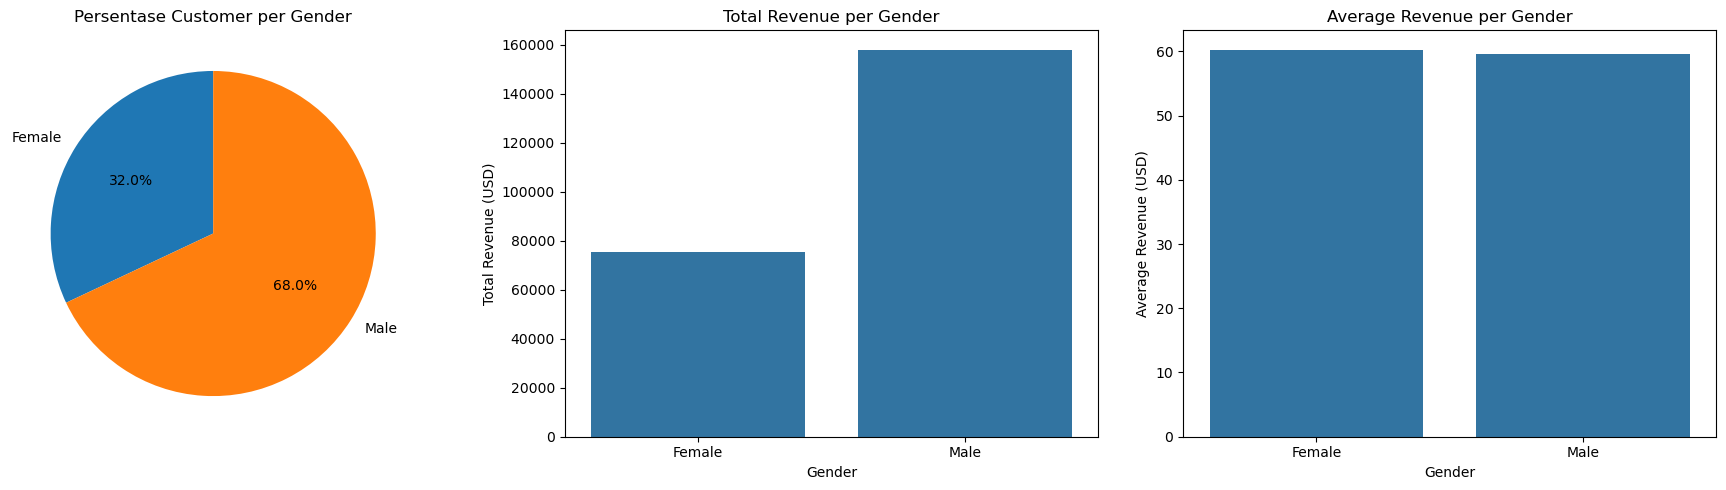

In [21]:
gender_stats = df.groupby("Gender").agg(
    frequency=("Customer ID", "count"),
    total_revenue=("Purchase Amount (USD)", "sum"),
    avg_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Total Customer per Gender
axes[0].pie(
    gender_stats["frequency"], 
    labels=gender_stats["Gender"], 
    autopct="%1.1f%%", 
    startangle=90, 
)
axes[0].set_title("Persentase Customer per Gender")

# Total revenue per gender 
sns.barplot(x="Gender", y="total_revenue", data=gender_stats, ax=axes[1])
axes[1].set_title("Total Revenue per Gender")
axes[1].set_ylabel("Total Revenue (USD)")

# Average revenue per gender
sns.barplot(x="Gender", y="avg_revenue", data=gender_stats, ax=axes[2])
axes[2].set_title("Average Revenue per Gender")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


### Insight:
- There are more male customers than female customers.
- Total revenue from male customers is higher.
- Average spending per customer is relatively the same between male and female customers.

### Conclusion:
- Gender affects total revenue (volume effect) because the number of customers differs.
- Gender does not significantly affect behavior effect because the average spending per individual is the same.

## 3.3 Geographic Analysis

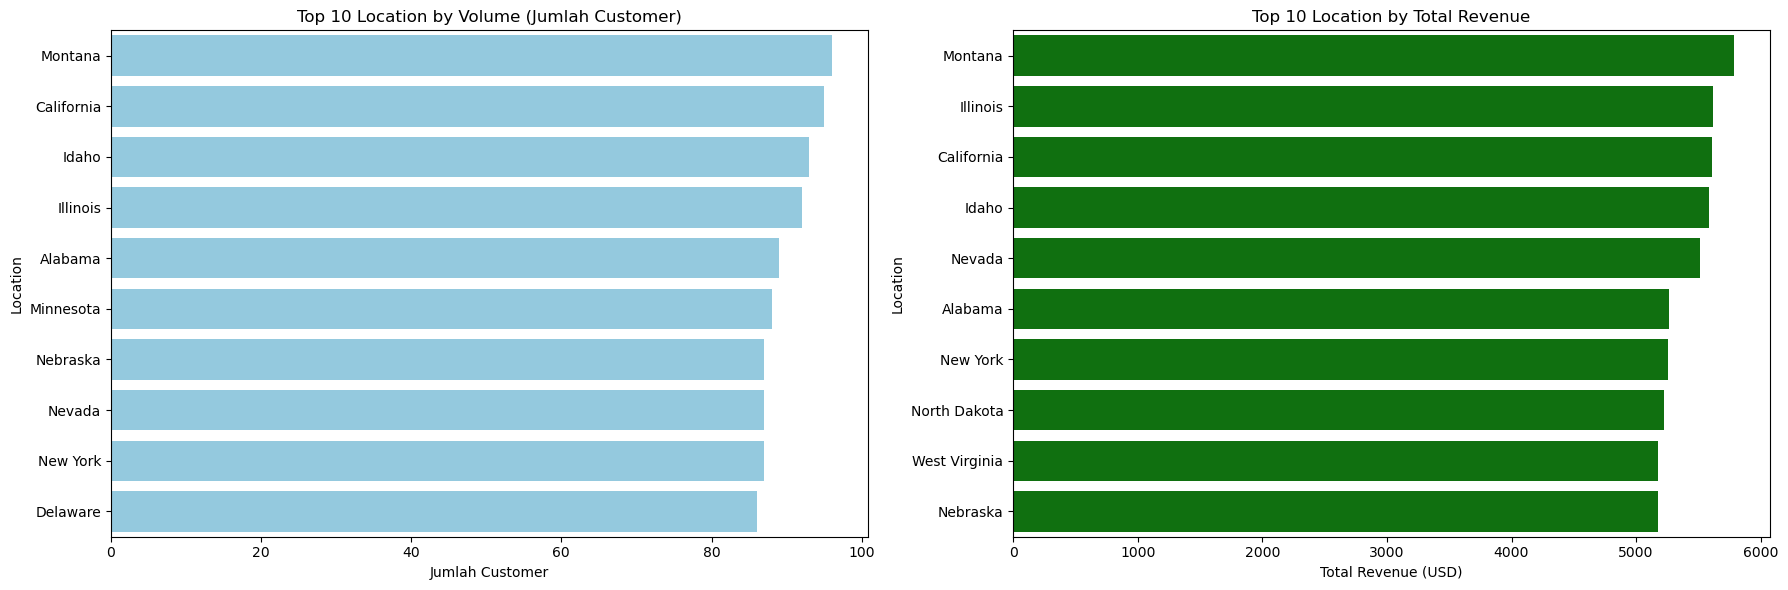

In [22]:
location_stats = df.groupby("Location").agg(
    volume=("Customer ID", "count"),
    total_revenue=("Purchase Amount (USD)", "sum")
).reset_index()

# Select Top 10 by volume and revenue
top10_volume = location_stats.nlargest(10, "volume")
top10_revenue = location_stats.nlargest(10, "total_revenue")

fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Top 10 Location by Volume 
sns.barplot(
    x="volume", y="Location", 
    data=top10_volume.sort_values("volume", ascending=False),
    ax=axes[0], color="skyblue"
)
axes[0].set_title("Top 10 Location by Volume (Jumlah Customer)")
axes[0].set_xlabel("Jumlah Customer")
axes[0].set_ylabel("Location")

# Top 10 Location by Total Revenue 
sns.barplot(
    x="total_revenue", y="Location", 
    data=top10_revenue.sort_values("total_revenue", ascending=False),
    ax=axes[1], color="green"
)
axes[1].set_title("Top 10 Location by Total Revenue")
axes[1].set_xlabel("Total Revenue (USD)")
axes[1].set_ylabel("Location")

plt.tight_layout()
plt.show()


## 3.4 Product Preference

### - Category

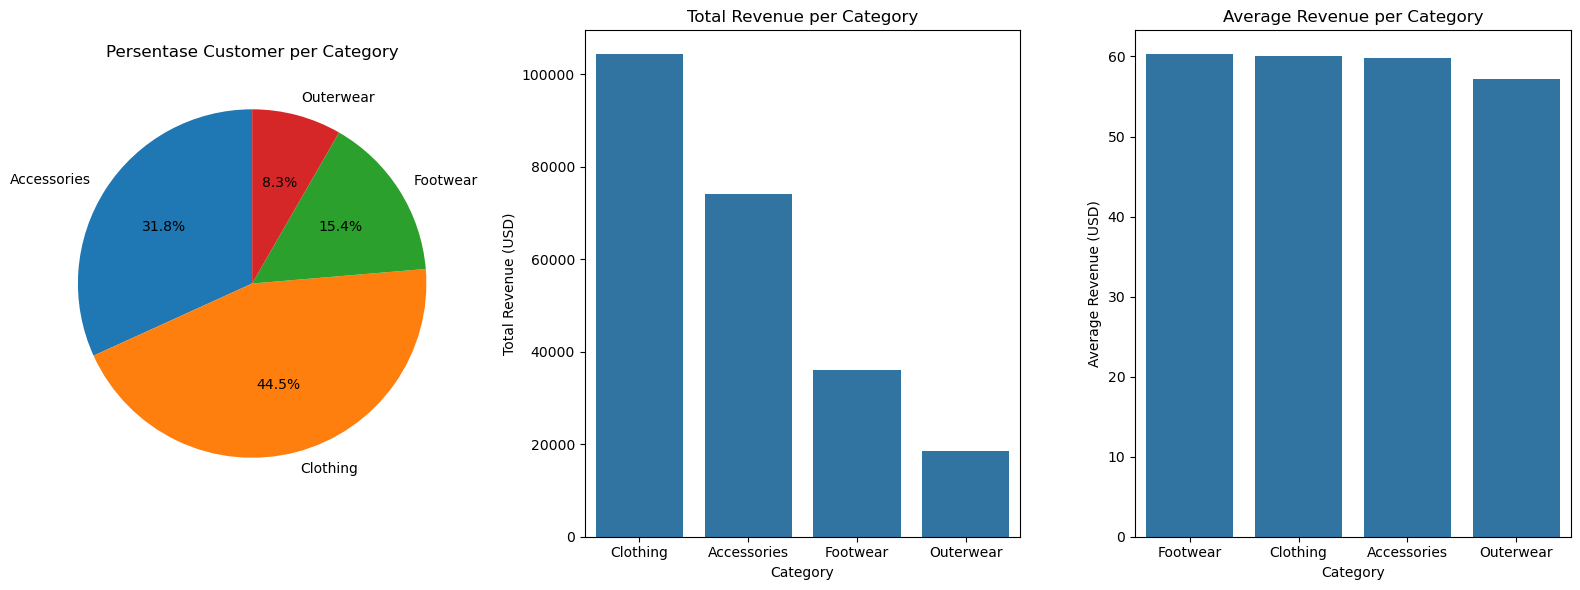

In [23]:
# Agregasi per category
category_stats = df.groupby("Category").agg(
    volume=("Customer ID", "count"),
    total_revenue=("Purchase Amount (USD)", "sum"),
    avg_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(16,6))

# Pie Chart
axes[0].pie(
    category_stats["volume"],
    labels=category_stats["Category"],
    autopct="%1.1f%%",
    startangle=90)
axes[0].set_title("Persentase Customer per Category")

# Barplot 
sns.barplot(
    x="Category", y="total_revenue",
    data=category_stats.sort_values("total_revenue", ascending=False),
    ax=axes[1])

axes[1].set_title("Total Revenue per Category")
axes[1].set_ylabel("Total Revenue (USD)")
axes[1].set_xlabel("Category")

sns.barplot(
    x="Category", y="avg_revenue",
    data=category_stats.sort_values("avg_revenue", ascending=False),
    ax=axes[2]
)
axes[2].set_title("Average Revenue per Category")
axes[2].set_ylabel("Average Revenue (USD)")
axes[2].set_xlabel("Category")


plt.tight_layout()
plt.show()


### - Item Purchased

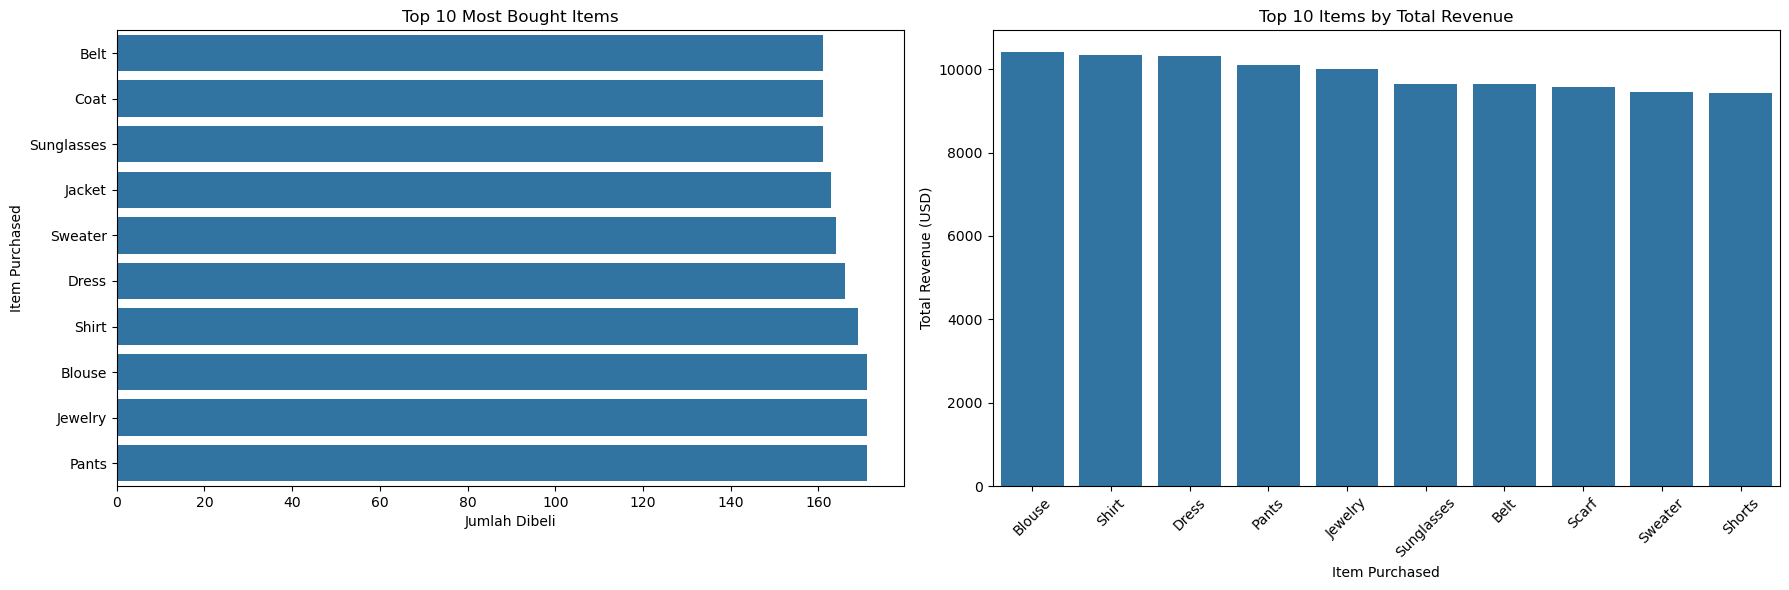

In [24]:
item_stats = df.groupby("Item Purchased").agg(
    volume=("Customer ID", "count"),             
    total_revenue=("Purchase Amount (USD)", "sum")  
).reset_index()

top10_volume = item_stats.nlargest(10, "volume")
top10_revenue = item_stats.nlargest(10, "total_revenue")

fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Top 10 Item Most Bought
sns.barplot(
    x="volume", y="Item Purchased",
    data=top10_volume.sort_values("volume", ascending=True),
    ax=axes[0]
)
axes[0].set_title("Top 10 Most Bought Items")
axes[0].set_xlabel("Jumlah Dibeli")
axes[0].set_ylabel("Item Purchased")

# Top 10 Item by Revenue
sns.barplot(
    x="Item Purchased", y="total_revenue",
    data=top10_revenue.sort_values("total_revenue", ascending=False),
    ax=axes[1]
)
axes[1].set_title("Top 10 Items by Total Revenue")
axes[1].set_xlabel("Item Purchased")
axes[1].set_ylabel("Total Revenue (USD)")
axes[1].tick_params(axis="x", rotation=45)  

plt.tight_layout()
plt.show()


### - Season

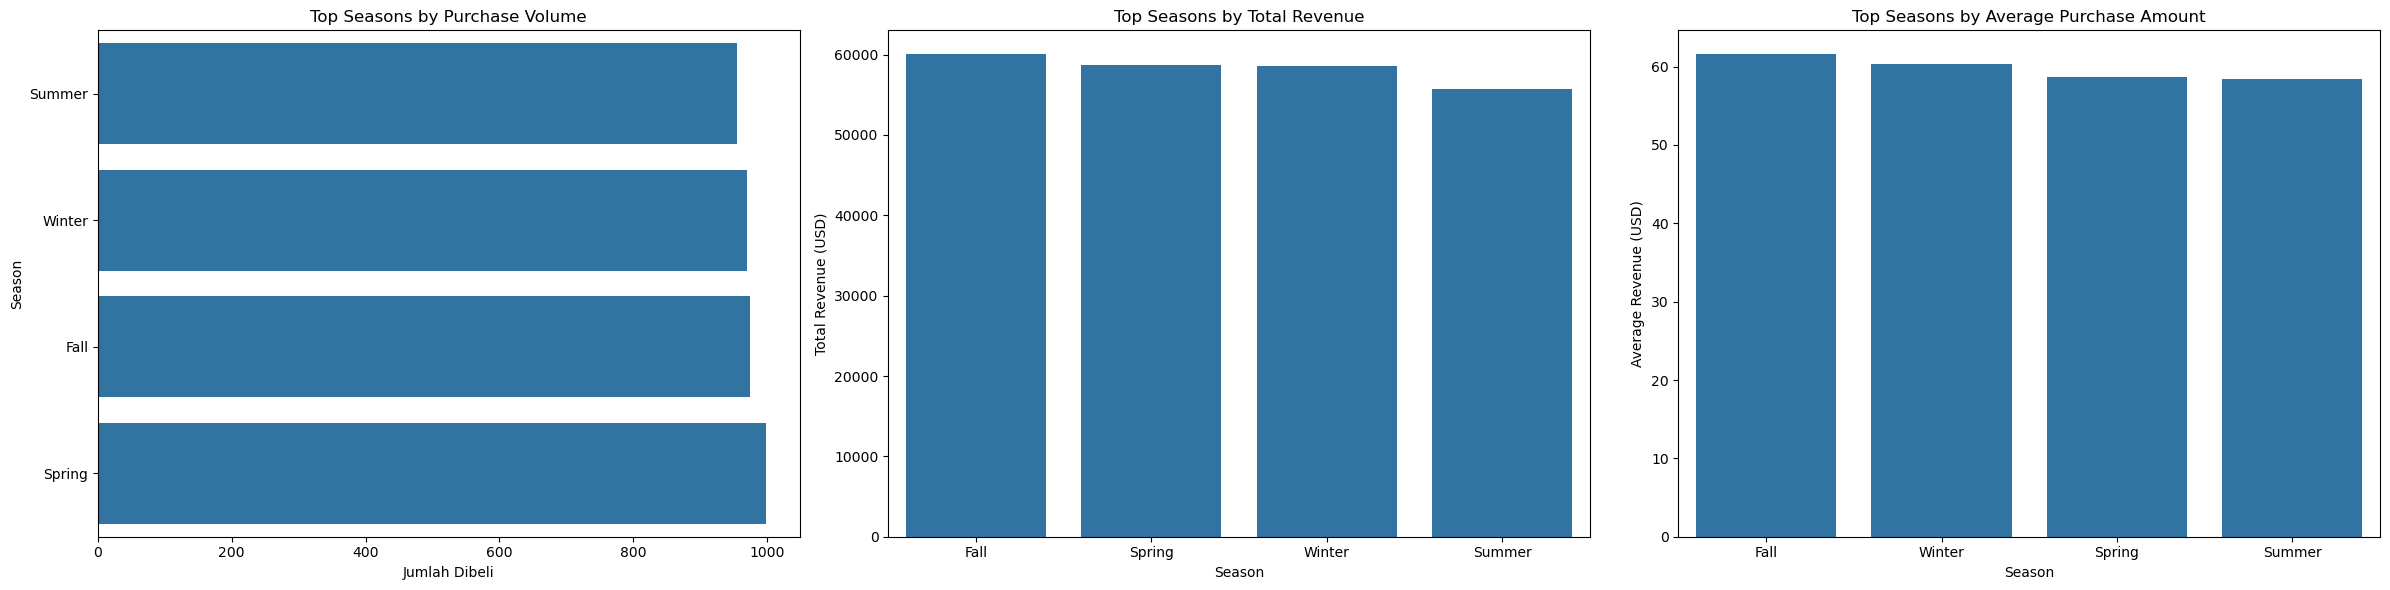

In [25]:
season_stats = df.groupby("Season").agg(
    volume=("Customer ID", "count"),             
    total_revenue=("Purchase Amount (USD)", "sum"),
    average_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24,6))

# Top Season by Volume
sns.barplot(
    x="volume", y="Season",
    data=season_stats.sort_values("volume", ascending=True),
    ax=axes[0]
)
axes[0].set_title("Top Seasons by Purchase Volume")
axes[0].set_xlabel("Jumlah Dibeli")
axes[0].set_ylabel("Season")

# Top Season by Total Revenue
sns.barplot(
    x="Season", y="total_revenue",
    data=season_stats.sort_values("total_revenue", ascending=False),
    ax=axes[1]
)
axes[1].set_title("Top Seasons by Total Revenue")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Total Revenue (USD)")

# Top Season by Average Revenue
sns.barplot(
    x="Season", y="average_revenue",
    data=season_stats.sort_values("average_revenue", ascending=False),
    ax=axes[2]
)
axes[2].set_title("Top Seasons by Average Purchase Amount")
axes[2].set_xlabel("Season")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


### - Size

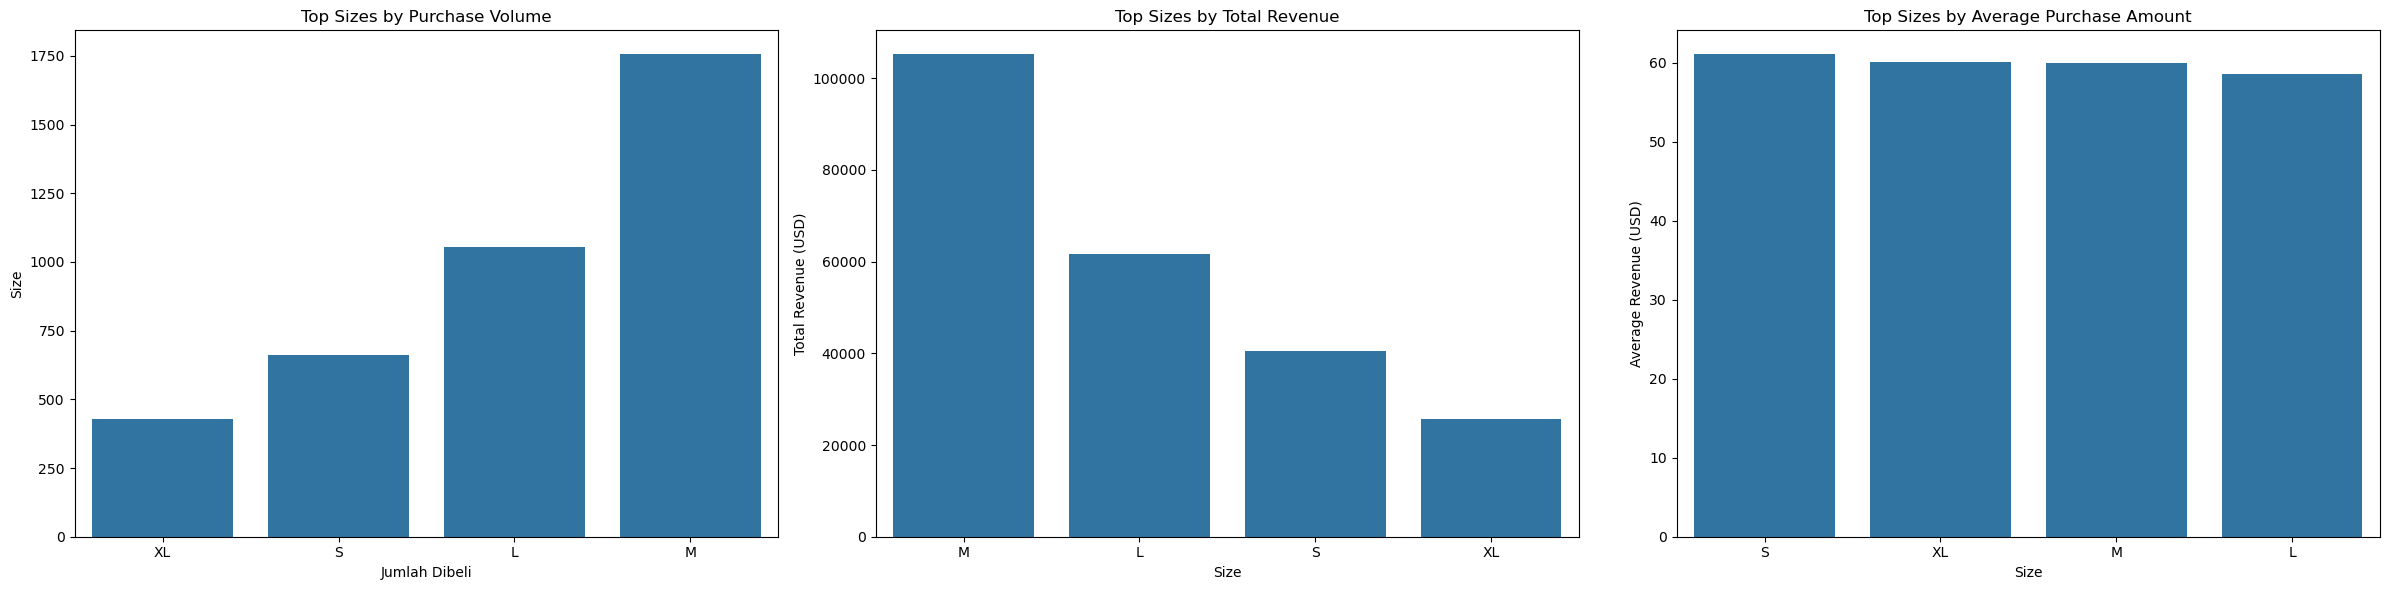

In [26]:
size_stats = df.groupby("Size").agg(
    volume=("Customer ID", "count"),             
    total_revenue=("Purchase Amount (USD)", "sum"),
    average_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24,6))

# Top Size by Volume
sns.barplot(
    x="Size", y="volume",
    data=size_stats.sort_values("volume", ascending=True),
    ax=axes[0]
)
axes[0].set_title("Top Sizes by Purchase Volume")
axes[0].set_xlabel("Jumlah Dibeli")
axes[0].set_ylabel("Size")

# Top Size by Total Revenue
sns.barplot(
    x="Size", y="total_revenue",
    data=size_stats.sort_values("total_revenue", ascending=False),
    ax=axes[1]
)
axes[1].set_title("Top Sizes by Total Revenue")
axes[1].set_xlabel("Size")
axes[1].set_ylabel("Total Revenue (USD)")

# Top Size by Average Revenue
sns.barplot(
    x="Size", y="average_revenue",
    data=size_stats.sort_values("average_revenue", ascending=False),
    ax=axes[2]
)
axes[2].set_title("Top Sizes by Average Purchase Amount")
axes[2].set_xlabel("Size")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


## 3.5 Customer Engagement

### - Frequency of Purchases

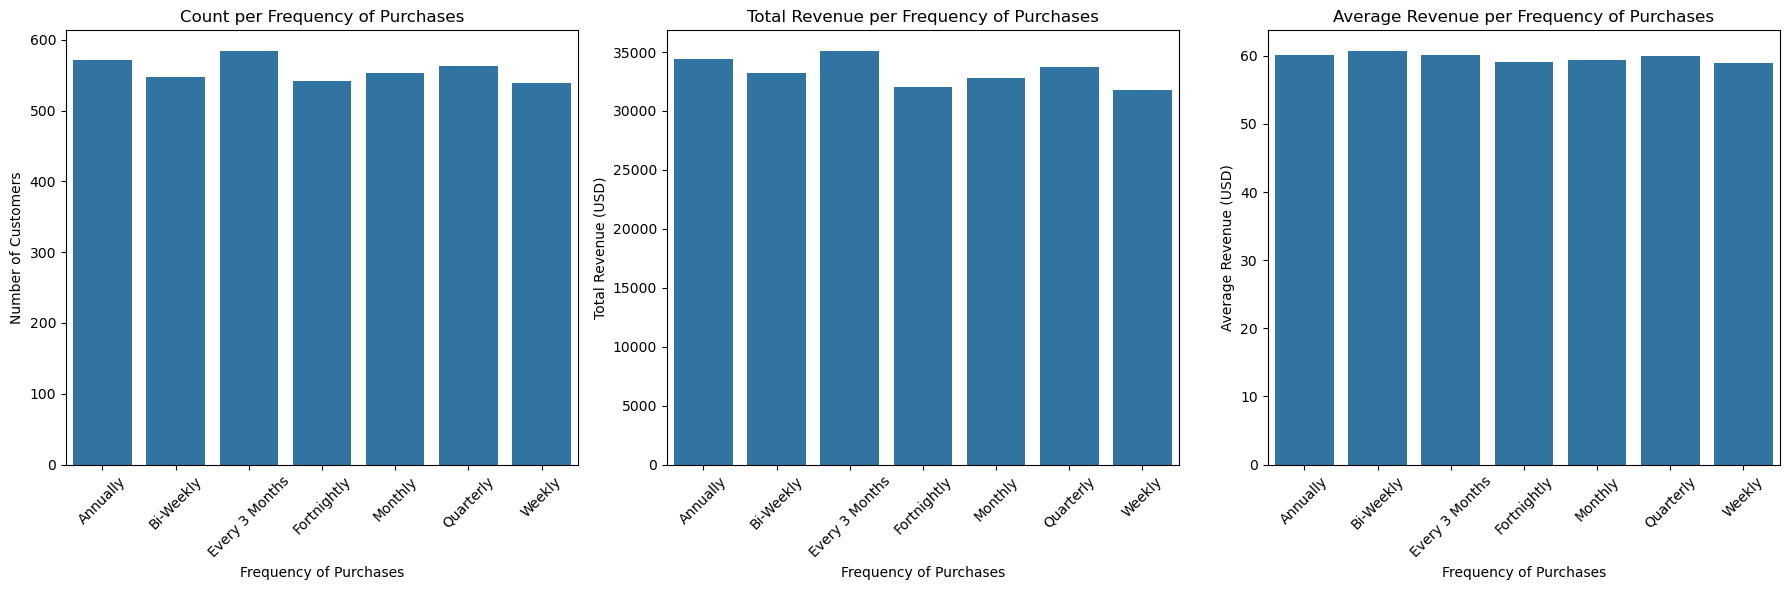

In [27]:
freq_revenue_stats = df.groupby("Frequency of Purchases").agg(
    count=("Purchase Amount (USD)", "count"),   
    total_revenue=("Purchase Amount (USD)", "sum"), 
    avg_revenue=("Purchase Amount (USD)", "mean")   
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(x="Frequency of Purchases", y="count", 
            data=freq_revenue_stats, ax=axes[0])
axes[0].set_title("Count per Frequency of Purchases")
axes[0].set_ylabel("Number of Customers")
axes[0].tick_params(axis="x", rotation=45)

# Total Revenue
sns.barplot(x="Frequency of Purchases", y="total_revenue", 
            data=freq_revenue_stats, ax=axes[1])
axes[1].set_title("Total Revenue per Frequency of Purchases")
axes[1].set_ylabel("Total Revenue (USD)")
axes[1].tick_params(axis="x", rotation=45)

# Average Revenue
sns.barplot(x="Frequency of Purchases", y="avg_revenue", 
            data=freq_revenue_stats, ax=axes[2])
axes[2].set_title("Average Revenue per Frequency of Purchases")
axes[2].set_ylabel("Average Revenue (USD)")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### - Previous Purchase

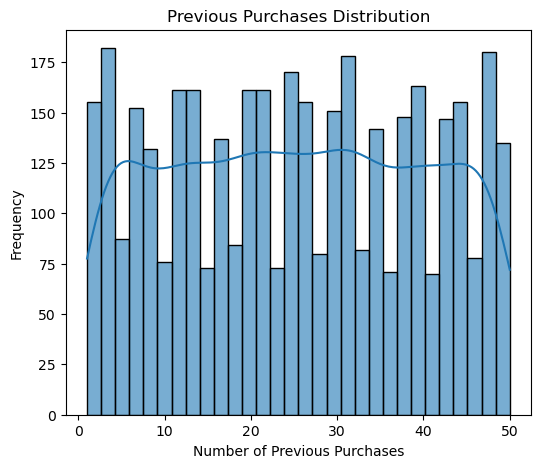

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

sns.histplot(
    df["Previous Purchases"], 
    bins=30,              
    kde=True,            
    alpha=0.6
)

plt.title("Previous Purchases Distribution")
plt.xlabel("Number of Previous Purchases")
plt.ylabel("Frequency")
plt.show()


### - Subscription Status

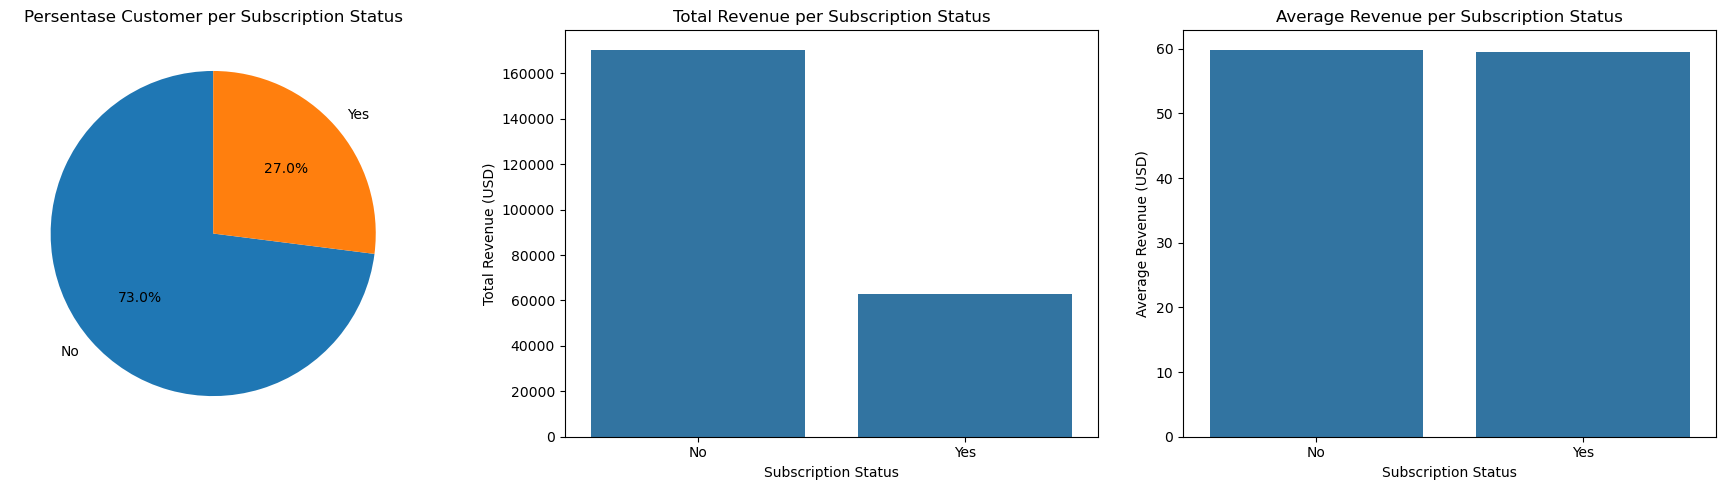

In [29]:
Subscription_Status_stats = df.groupby("Subscription Status").agg(
    frequency=("Customer ID", "count"),
    total_revenue=("Purchase Amount (USD)", "sum"),
    avg_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Total customer per gender
axes[0].pie(
    Subscription_Status_stats["frequency"], 
    labels=Subscription_Status_stats["Subscription Status"], 
    autopct="%1.1f%%", 
    startangle=90, 
)
axes[0].set_title("Persentase Customer per Subscription Status")

# Total revenue per gender
sns.barplot(x="Subscription Status", y="total_revenue", data=Subscription_Status_stats, ax=axes[1])
axes[1].set_title("Total Revenue per Subscription Status")
axes[1].set_ylabel("Total Revenue (USD)")

# Average revenue per gender
sns.barplot(x="Subscription Status", y="avg_revenue", data=Subscription_Status_stats, ax=axes[2])
axes[2].set_title("Average Revenue per Subscription Status")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


## 3.6 Promotion Effect Analysis

### - Discount and Code Applied

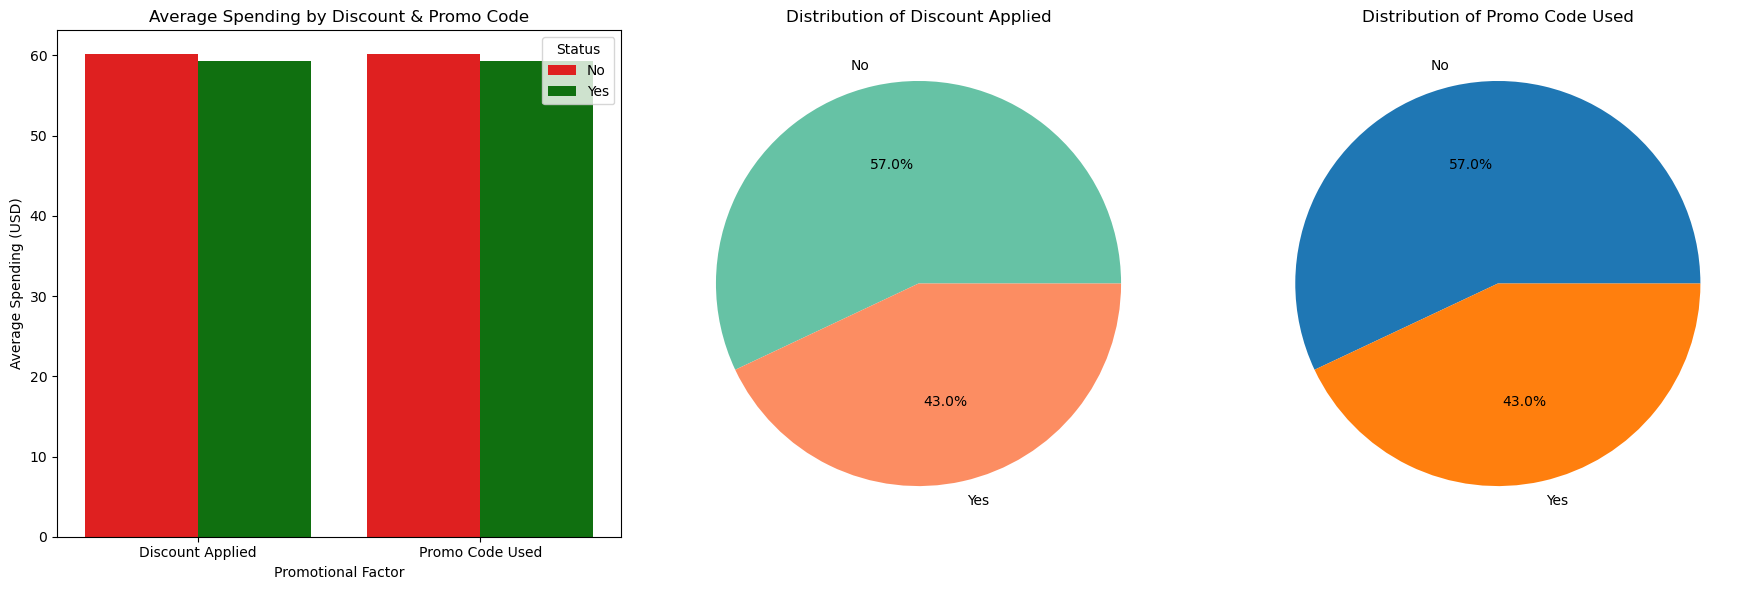

In [30]:
cols = ["Discount Applied", "Promo Code Used"]
avg_list = []
for col in cols:
    temp = df.groupby(col)["Purchase Amount (USD)"].mean().reset_index()
    temp["Factor"] = col
    temp.rename(columns={col: "Status", "Purchase Amount (USD)": "Average Spending"}, inplace=True)
    avg_list.append(temp)

avg_spending = pd.concat(avg_list)

discount_counts = df["Discount Applied"].value_counts()
promo_counts = df["Promo Code Used"].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Average Spending
sns.barplot(
    x="Factor", y="Average Spending", hue="Status",
    data=avg_spending, palette={"Yes":"green","No":"red"}, ax=axes[0]
)
axes[0].set_title("Average Spending by Discount & Promo Code")
axes[0].set_xlabel("Promotional Factor")
axes[0].set_ylabel("Average Spending (USD)")
axes[0].legend(title="Status")

# Discount Applied
axes[1].pie(
    discount_counts,
    labels=discount_counts.index,
    autopct="%1.1f%%",
    colors=["#66c2a5","#fc8d62"]
)
axes[1].set_title("Distribution of Discount Applied")

# Promo Code Used
axes[2].pie(
    promo_counts,
    labels=promo_counts.index,
    autopct="%1.1f%%")
axes[2].set_title("Distribution of Promo Code Used")

plt.tight_layout()
plt.show()


## 3.7 Payment Analysis

### - Payment Method

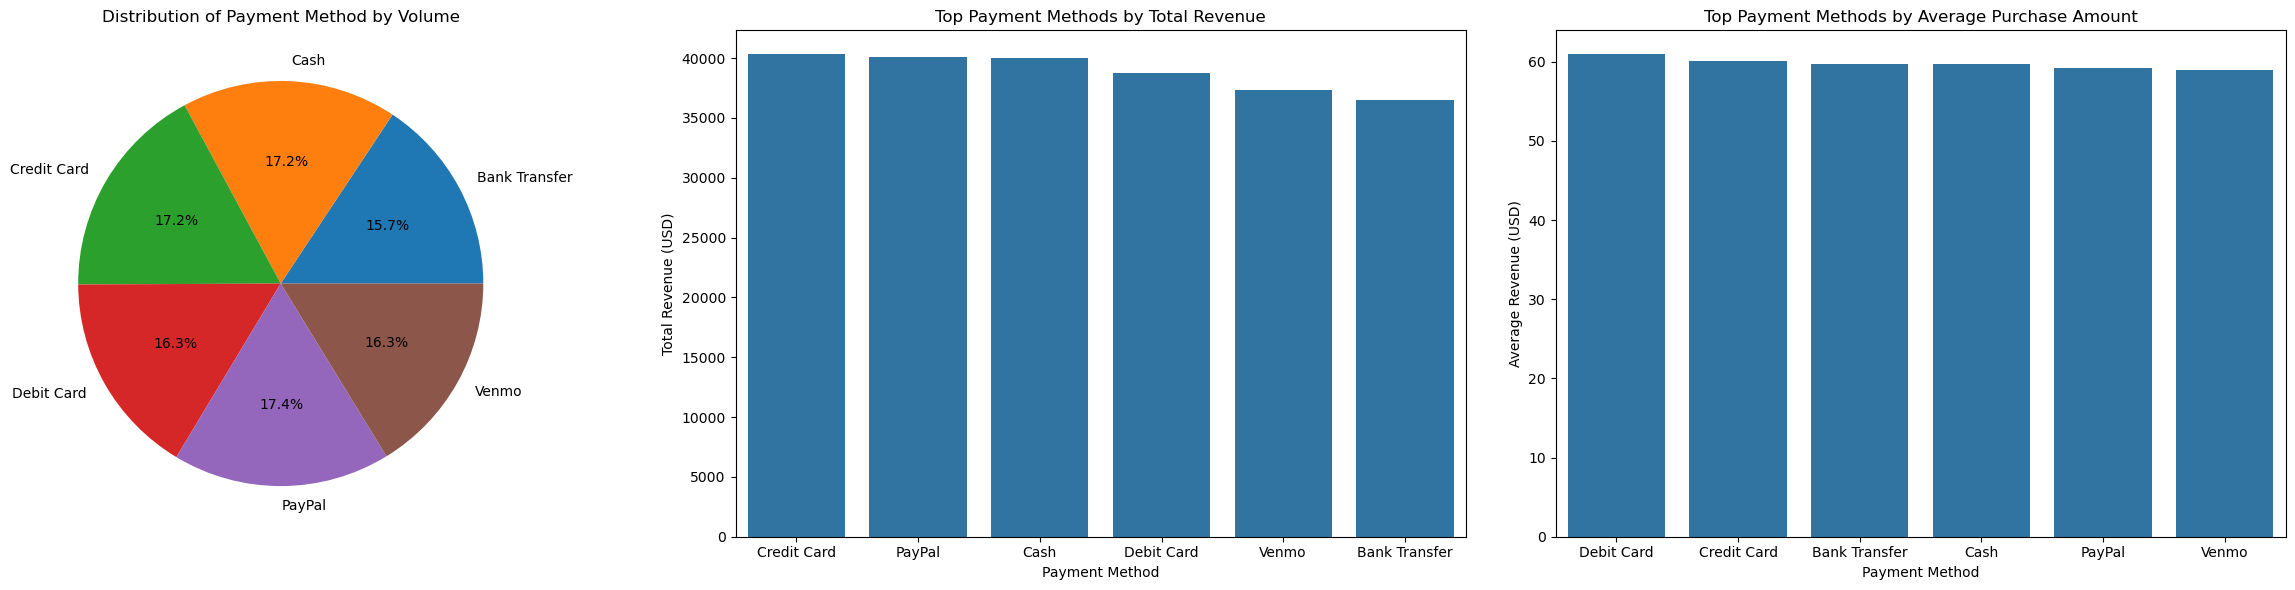

In [31]:
payment_stats = df.groupby("Payment Method").agg(
    volume=("Customer ID", "count"),             
    total_revenue=("Purchase Amount (USD)", "sum"),
    average_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24,6))

# Top Payment Method by Volume
axes[0].pie(
    payment_stats["volume"],
    labels=payment_stats["Payment Method"],
    autopct="%1.1f%%")
axes[0].set_title("Distribution of Payment Method by Volume")

# Top Payment Method by Total Revenue
sns.barplot(
    x="Payment Method", y="total_revenue",
    data=payment_stats.sort_values("total_revenue", ascending=False),
    ax=axes[1]
)
axes[1].set_title("Top Payment Methods by Total Revenue")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Total Revenue (USD)")

# Top Payment Method by Average Revenue
sns.barplot(
    x="Payment Method", y="average_revenue",
    data=payment_stats.sort_values("average_revenue", ascending=False),
    ax=axes[2]
)
axes[2].set_title("Top Payment Methods by Average Purchase Amount")
axes[2].set_xlabel("Payment Method")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


### - Shipping Type

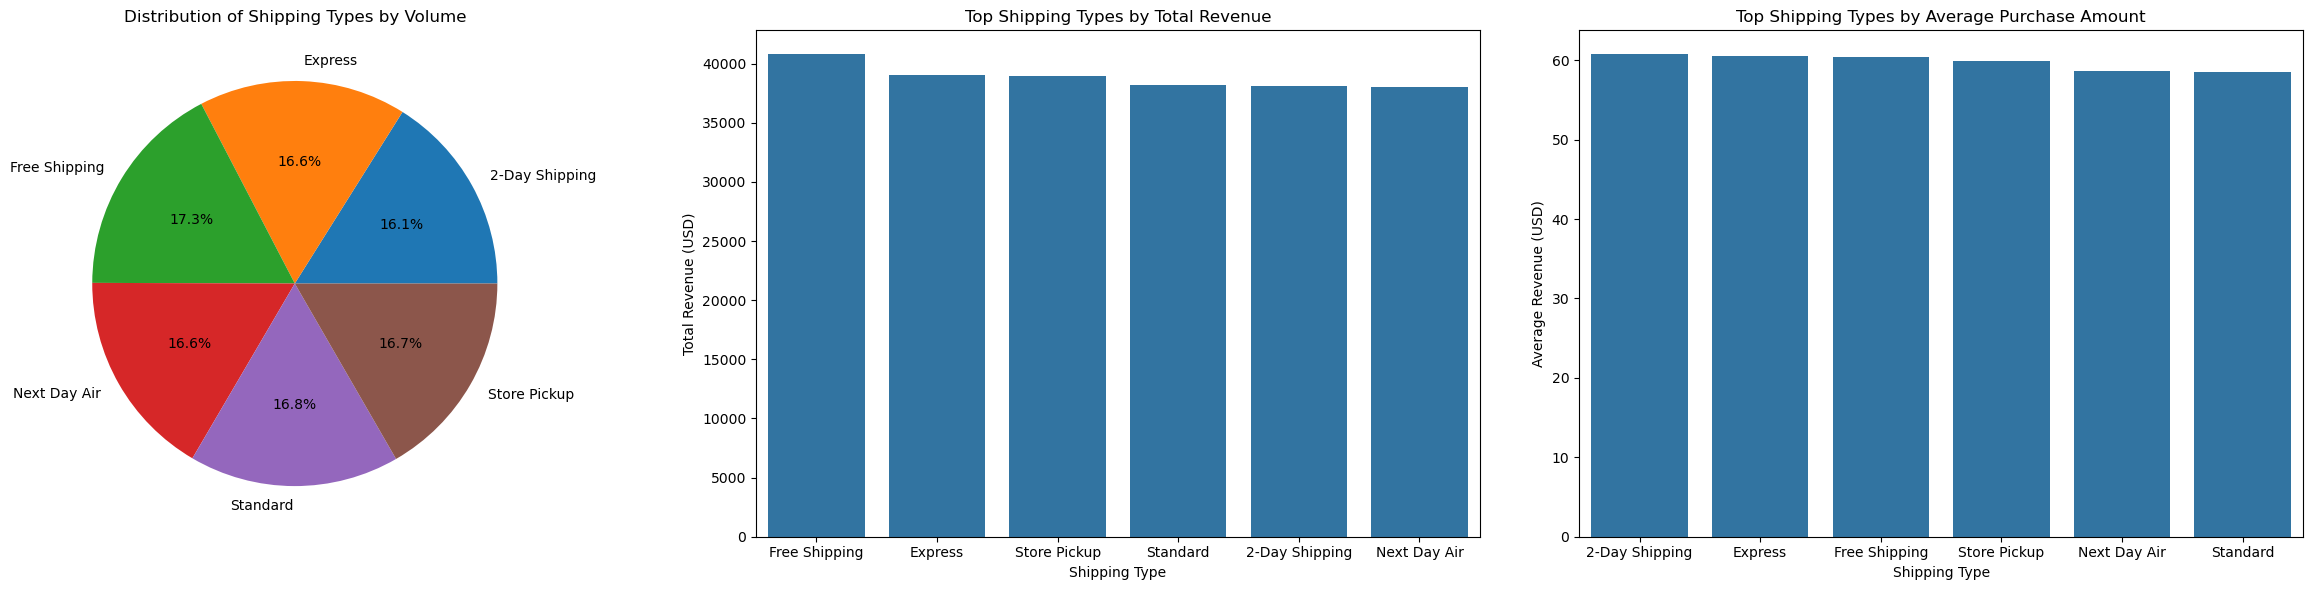

In [32]:
shipping_stats = df.groupby("Shipping Type").agg(
    volume=("Customer ID", "count"),             
    total_revenue=("Purchase Amount (USD)", "sum"),
    average_revenue=("Purchase Amount (USD)", "mean")
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(24,6))

# Top Shipping Type by Volume
axes[0].pie(
    shipping_stats["volume"],
    labels=shipping_stats["Shipping Type"],
    autopct="%1.1f%%")
axes[0].set_title("Distribution of Shipping Types by Volume")

# Top Shipping Type by Total Revenue
sns.barplot(
    x="Shipping Type", y="total_revenue",
    data=shipping_stats.sort_values("total_revenue", ascending=False),
    ax=axes[1]
)
axes[1].set_title("Top Shipping Types by Total Revenue")
axes[1].set_xlabel("Shipping Type")
axes[1].set_ylabel("Total Revenue (USD)")

# Top Shipping Type by Average Revenue
sns.barplot(
    x="Shipping Type", y="average_revenue",
    data=shipping_stats.sort_values("average_revenue", ascending=False),
    ax=axes[2]
)
axes[2].set_title("Top Shipping Types by Average Purchase Amount")
axes[2].set_xlabel("Shipping Type")
axes[2].set_ylabel("Average Revenue (USD)")

plt.tight_layout()
plt.show()


## 3.8 Customer Experience

### - Review Rating

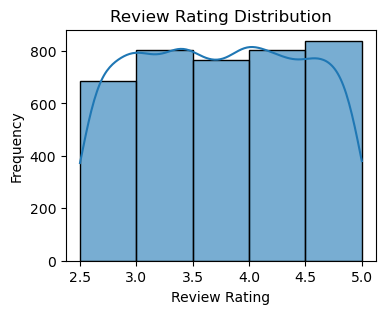

In [33]:
plt.figure(figsize=(4,3))

sns.histplot(
    df["Review Rating"], 
    bins=5,              
    kde=True,            
    alpha=0.6
)

plt.title("Review Rating Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")
plt.show()
